## Observations and Insights

## Dependencies and starter code

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from stats import mean, median, mode, multi_mode
from spread import variance, standard_deviation, zipped_z_scores
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import random

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Average or Mean value
avg_val = combined_mouse_df.groupby(["Drug Regimen"]).mean()
avgdf = pd.DataFrame(avg_val)
avgvoldf = round(avg_val["Tumor Volume (mm3)"],2)
avgvoldf = pd.DataFrame(avgvoldf)
avgvoldf = avgvoldf.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Vol (mm3)"})
 
#Median value
med_val = combined_mouse_df.groupby(["Drug Regimen"]).median()
meddf = pd.DataFrame(med_val)
medvoldf = round(med_val["Tumor Volume (mm3)"], 2)
medvoldf = pd.DataFrame(medvoldf)
medvoldf = medvoldf.rename(columns = {"Tumor Volume (mm3)": "Median Tumor Vol (mm3)"})

# Variance value 
var_val = combined_mouse_df.groupby(["Drug Regimen"]).var()
vardf = pd.DataFrame(var_val)
varvoldf = round(var_val["Tumor Volume (mm3)"], 4)
varvoldf = pd.DataFrame(varvoldf)
varvoldf = varvoldf.rename(columns = {"Tumor Volume (mm3)": "Variance"})

# Standard Deviation value
stddev_val = combined_mouse_df.groupby(["Drug Regimen"]).std()
stddevdf = pd.DataFrame(stddev_val)
stddevvoldf = round(stddev_val["Tumor Volume (mm3)"], 4)
stddevvoldf = pd.DataFrame(stddevvoldf)
stddevvoldf = stddevvoldf.rename(columns = {"Tumor Volume (mm3)": "Std Dev (mm3)"})

# SEM Value
sem_val = combined_mouse_df.groupby(["Drug Regimen"]).sem()
semdf = pd.DataFrame(sem_val)
semvoldf = round(semdf["Tumor Volume (mm3)"],4)
semvoldf = pd.DataFrame(semvoldf)
semvoldf = semvoldf.rename(columns = {"Tumor Volume (mm3)": "SEM"})

# Combine DataFrames into one summary table
vol_stat_df = pd.merge(avgvoldf, medvoldf, how="outer", on="Drug Regimen")
vol_stat_df = pd.merge(vol_stat_df, varvoldf, how="outer", on="Drug Regimen")
vol_stat_df = pd.merge(vol_stat_df, stddevvoldf, how="outer", on="Drug Regimen")
vol_stat_df = pd.merge(vol_stat_df, semvoldf, how="outer", on="Drug Regimen")
vol_stat_df

,Average Tumor Vol (mm3),Median Tumor Vol (mm3),Variance,Std Dev (mm3),SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.9478,4.9948,0.3293
Ceftamin,52.59,51.78,39.2902,6.2682,0.4698
Infubinol,52.88,51.82,43.1287,6.5672,0.4922
Ketapril,55.24,53.70,68.5536,8.2797,0.6039
Naftisol,54.33,52.51,66.1735,8.1347,0.5965
Placebo,54.03,52.29,61.1681,7.8210,0.5813
Propriva,52.32,50.85,42.3511,6.5078,0.5129
Ramicane,40.22,40.67,23.4867,4.8463,0.3210
Stelasyn,54.23,52.43,59.4506,7.7104,0.5731


## Bar plots

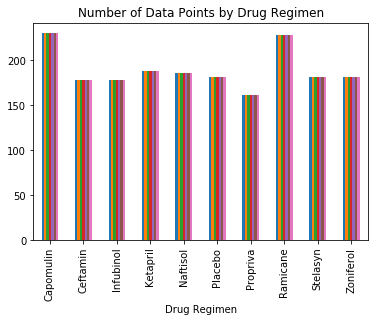

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_mouse_df.groupby('Drug Regimen').count().plot(kind='bar', legend=False, title = "Number of Data Points by Drug Regimen")


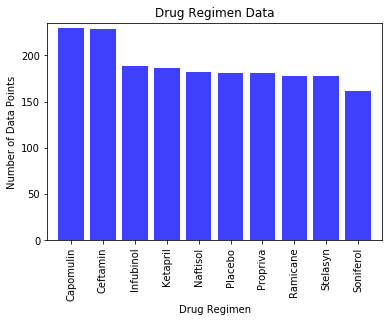

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Soniferol"]
datapoints = []
countlist = combined_mouse_df["Drug Regimen"].value_counts()
for x in countlist:
    datapoints.append(x)
    
x_axis = np.arange(0, len(regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.xlim(-0.75, len(regimen)-.25)
plt.ylim(0, max(datapoints) + 5)

plt.bar(x_axis, datapoints, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, regimen, rotation = "vertical")
plt.show()

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E7F76A128>],
      dtype=object)

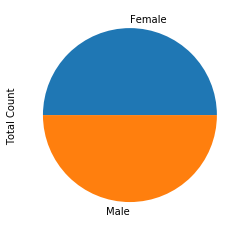

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = ["Male", "Female"]
genderdata = []
countlist3 = combined_mouse_df["Sex"].value_counts()
for x in countlist3:
    genderdata.append(x)

gender_df = {"Gender":genders, "Total Count":genderdata}
gender_df = pd.DataFrame(gender_df)
gender_df.groupby("Gender").count().plot(kind = "pie", subplots = True, legend = False)

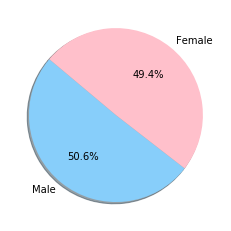

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
genderpoints = []
countlist2 = combined_mouse_df["Sex"].value_counts()
for x in countlist2:
    genderpoints.append(x)
    
colors = ["lightskyblue","pink"]
#explode = (0.1,0,0,0,0,0,0,0,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(genderpoints, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

## Quartiles, outliers and boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# sort to get top 4 biggest differences

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# get last tumor vol
                

## Line and scatter plots

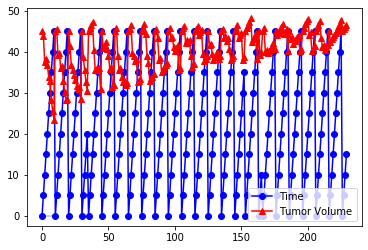

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_data = combined_mouse_df.loc[combined_mouse_df['Drug Regimen'] == "Capomulin"]

timepoint = []
for t in capo_data["Timepoint"]:
    timepoint.append(t)
    
tvol = []
for vol in capo_data["Tumor Volume (mm3)"]:
    tvol.append(vol)
    
x_axis = np.arange(0, 230, 1)
sin = np.sin(x_axis)
cos = np.cos(x_axis)

plt.hlines(0, 0, 10, alpha=0.25)

# Each point on the sine chart is marked by a blue circle
time_handle, = plt.plot(x_axis, timepoint, marker ='o', color='blue', label="Time")
# Each point on the cosine chart is marked by a red triangle
vol_handle, = plt.plot(x_axis, tvol, marker='^', color='red', label="Tumor Volume")

plt.legend(loc="lower right")
plt.show()


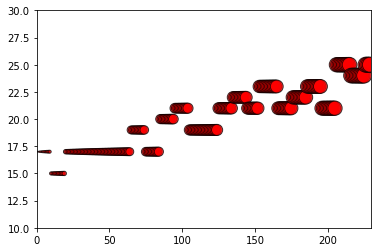

[17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 21,
 21,
 21,
 21,


In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = capo_data["Weight (g)"]
avg_capo = capo_data["Tumor Volume (mm3)"].mean()

# The maximum x value for our chart will be 100
x_limit = 230

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
dataw = []
for w in weight:
    dataw.append(w)

plt.scatter(x_axis, dataw, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)    
    
plt.ylim(10, 30)    
plt.xlim(0, 230)   
plt.show()    
   

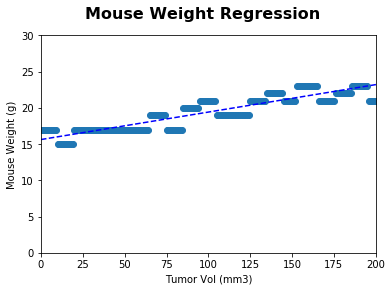

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
weight = capo_data["Weight (g)"]
avgcapo = capo_data["Tumor Volume (mm3)"]

x_axis = np.arange(0, 230, 1)

wght = []
for x in weight:
    wght.append(x)

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, wght)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Mouse Weight Regression", fontsize=16, fontweight="bold")
ax.set_xlim(0, 200)
ax.set_ylim(0, 30)

ax.set_xlabel("Tumor Vol (mm3)")
ax.set_ylabel("Mouse Weight (g)")

ax.plot(x_axis, wght, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()